<a href="https://colab.research.google.com/github/pickles7/SciKit-Learn/blob/master/clustering_algorithms_for_wine_V3_ipyndb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10 clustering algorithms with python

https://machinelearningmastery.com/clustering-algorithms-with-python/

for theory look at:
https://scikit-learn.org/stable/modules/clustering.html

>>> also brought in my wine classifier - TITANIC

In [0]:
 ! pip install -q kaggle

upload kaggle.json

In [0]:
! mkdir ~/.kaggle    # NO FOR NOW

In [0]:
! cp kaggle.json ~/.kaggle/  # NO FOR NOW

cp: cannot stat 'kaggle.json': No such file or directory


In [0]:
! chmod 600 ~/.kaggle/kaggle.json  # NO FOR NOW

# Download Data

In [0]:
!kaggle datasets list  # NO FOR NOW

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-11 13:32:24          49847  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           3026  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        428KB  2020-04-13 12:04:39           3495  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            699  
bappekim/air-pollution-in-seoul               

In [0]:
! kaggle download -d 'Classifying wine varieties'  # NO FOR NOW

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'download' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [0]:
  # NO FOR NOW:   pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/fall2018-materials/master/input/train.csv')

## >>>  START HERE FOR REAL  ***

# **>>> could not find dataset -- just downloaded**
# **wineuci.zip**
and uploaded here

(https://www.kaggle.com/brynja/wineuci)

docs:  http://archive.ics.uci.edu/ml/datasets/wine

In [0]:
! unzip wineuci.zip

Archive:  wineuci.zip
  inflating: Wine.csv                


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('Wine.csv',header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [0]:
# add column names
df.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [0]:
# check for missing values
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64


# Heatmap for Correlation of Parameters


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


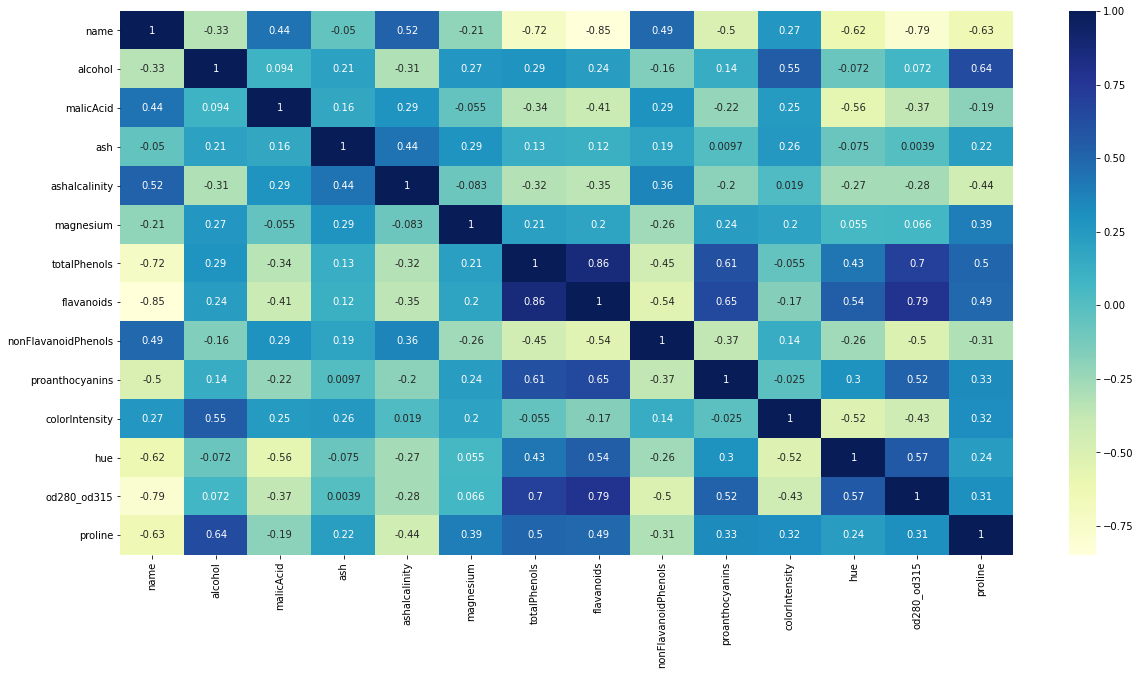

In [0]:
import seaborn as sns
plt.figure(figsize=(20,10))
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)


In [0]:
# ash is least correlated so drop
X= df.drop(['name','ash'], axis=1)
X.head()
df.head()


,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
df.tail()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [0]:
# labels
Y=df.iloc[:,:1]
Y.head(2)

,name
0,1
1,1


In [0]:
Y.tail(2)

,name
176,3
177,3


## Clustering Dataset

***>>>  used wine dataset so this is all different***

The dataset will have 1,000 examples, with two input features and one cluster per class. The clusters are visually obvious in two dimensions so that we can plot the data with a scatter plot and color the points in the plot by the assigned cluster. This will help to see, at least on the test problem, how “well” the clusters were identified.

The clusters in this test problem are based on a multivariate Gaussian, and not all clustering algorithms will be effective at identifying these types of clusters. As such, the results in this tutorial should not be used as the basis for comparing the methods generally.

## An example of creating and summarizing the synthetic clustering dataset is listed below.

**for all of the wine data:**

  n_samples = 178

  n_features = 2

  n_classes = 3

  number clusters = 3  (for those techniques that use this)

(array([  2,   8,  10,  11,  13,  22,  23,  25,  26,  27,  28,  33,  34,
        38,  41,  45,  49,  50,  58,  64,  68,  70,  73,  74,  77,  81,
        88,  89,  93,  94,  95, 100, 102, 103, 105, 106, 110, 113, 114,
       115, 116, 117, 118, 121, 122, 130, 132, 136, 143, 144, 150, 151,
       152, 154, 160, 163, 169, 172, 173, 176]),)
[[-1.92199359 -1.10002136 -2.2046041  -0.58715087 -1.00019699 -2.00933061
  -0.76837327 -0.61067779 -1.68597662 -0.65991851 -1.8306105  -0.82128108
  -2.07583553 -0.35164553 -0.68462353 -1.41515146 -2.35979793 -1.6976471
  -0.69974343 -0.7551345  -0.9277444  -2.06011936 -1.74935826  0.09109851
  -0.6788519   0.03413233 -0.95816963 -1.49705449 -1.21128909 -0.80212268
  -0.7626303  -0.14321405 -2.26756572  0.04860948 -0.41939989 -0.98108835
  -0.955106   -1.5639159  -1.92594967 -0.72174654 -0.85964932 -1.11295684
  -1.78083798 -0.53552881 -1.56430909 -1.76797493 -0.61934562 -2.45748402
  -1.05024174 -1.19809333 -1.37320585 -1.54051822 -1.80820351 -1.60828

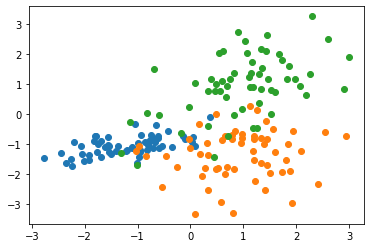

In [0]:
# wine classification dataset, with only 2 features
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(3):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
	# print out some stuff
	print(row_ix)
	print(X[row_ix, 0])
# show the plot
pyplot.show()

Running the example creates the synthetic clustering dataset, then creates a scatter plot of the input data with points colored by class label (idealized clusters).

We can clearly see two distinct groups of data in two dimensions and the hope would be that an automatic clustering algorithm can detect these groupings.

Next, we can start looking at examples of clustering algorithms applied to this dataset.

I have made some minimal attempts to tune each method to the dataset.

## Affinity Propagation

Affinity Propagation involves finding a set of exemplars that best summarize the data.

    We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

— Clustering by Passing Messages Between Data Points, 2007.

The technique is described in the paper:

    Clustering by Passing Messages Between Data Points, 2007.

It is implemented via the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.”

The complete example is listed below.

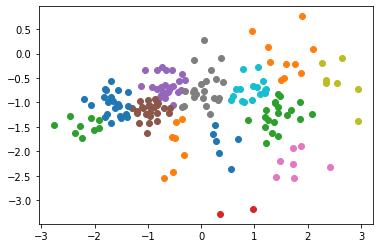

In [0]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.5)	# try 0.5
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, I could not achieve a good result.

## Agglomerative Clustering

Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

It is a part of a broader class of hierarchical clustering methods and you can learn more here:

    Hierarchical clustering, Wikipedia.

It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data, e.g. 2.

The complete example is listed below.

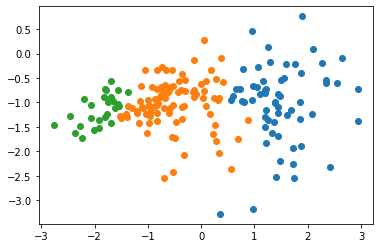

In [0]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=3)   # clusters = 3
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found.

## BIRCH

BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

    BIRCH incrementally and dynamically clusters incoming multi-dimensional metric data points to try to produce the best quality clustering with the available resources (i. e., available memory and time constraints).

— BIRCH: An efficient data clustering method for large databases, 1996.

The technique is described in the paper:

    BIRCH: An efficient data clustering method for large databases, 1996.

It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters.

The complete example is listed below.

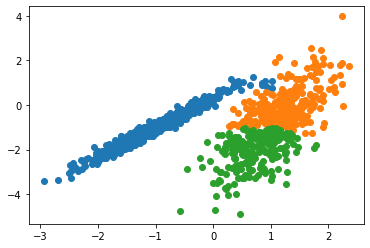

In [0]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=3)   # thresh=0.01, nclusters=3
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, an excellent grouping is found.

## DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

    … we present the new clustering algorithm DBSCAN relying on a density-based notion of clusters which is designed to discover clusters of arbitrary shape. DBSCAN requires only one input parameter and supports the user in determining an appropriate value for it

— A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise, 1996.

The technique is described in the paper:

    A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise, 1996.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

The complete example is listed below.

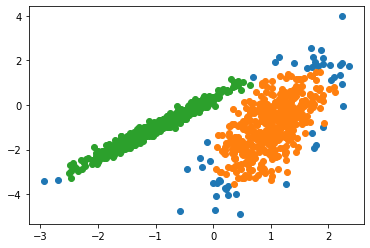

In [0]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found, although more tuning is required.

### K-Means

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

    The main purpose of this paper is to describe a process for partitioning an N-dimensional population into k sets on the basis of a sample. The process, which is called ‘k-means,’ appears to give partitions which are reasonably efficient in the sense of within-class variance.

— Some methods for classification and analysis of multivariate observations, 1967.

The technique is described here:

    k-means clustering, Wikipedia.

It is implemented via the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

The complete example is listed below.

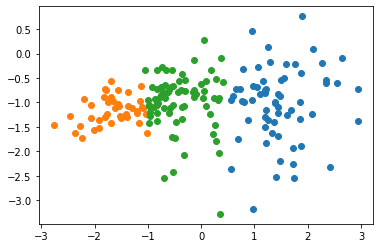

In [0]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=3)    # nclusters=3
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Mini-Batch K-Means

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

    … we propose the use of mini-batch optimization for k-means clustering. This reduces computation cost by orders of magnitude compared to the classic batch algorithm while yielding significantly better solutions than online stochastic gradient descent.

— Web-Scale K-Means Clustering, 2010.

The technique is described in the paper:

    Web-Scale K-Means Clustering, 2010.

It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

The complete example is listed below.

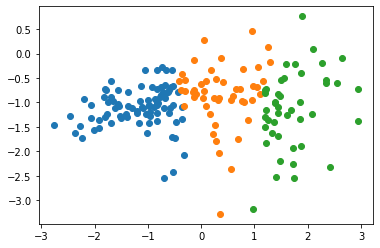

In [0]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MiniBatchKMeans(n_clusters=3)    # nclusters=3
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a result equivalent to the standard k-means algorithm is found.

# Mean Shift

Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

    We prove for discrete data the convergence of a recursive mean shift procedure to the nearest stationary point of the underlying density function and thus its utility in detecting the modes of the density.

— Mean Shift: A robust approach toward feature space analysis, 2002.

The technique is described in the paper:

    Mean Shift: A robust approach toward feature space analysis, 2002.

It is implemented via the MeanShift class and the main configuration to tune is the “bandwidth” hyperparameter.

The complete example is listed below.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable set of clusters are found in the data.

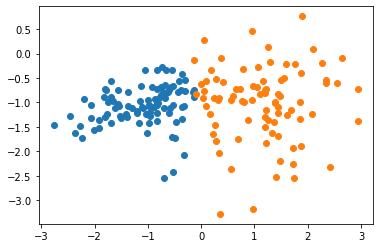

In [0]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# OPTICS

OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.

    We introduce a new algorithm for the purpose of cluster analysis which does not produce a clustering of a data set explicitly; but instead creates an augmented ordering of the database representing its density-based clustering structure. This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a broad range of parameter settings.

— OPTICS: ordering points to identify the clustering structure, 1999.

The technique is described in the paper:

    OPTICS: ordering points to identify the clustering structure, 1999.

It is implemented via the OPTICS class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

The complete example is listed below.

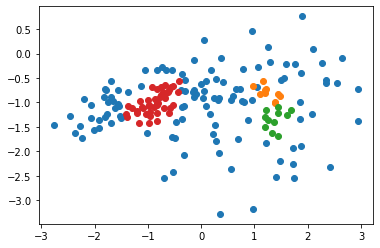

In [0]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, I could not achieve a reasonable result on this dataset.

# Spectral Clustering

Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

    A promising alternative that has recently emerged in a number of fields is to use spectral methods for clustering. Here, one uses the top eigenvectors of a matrix derived from the distance between points.

— On Spectral Clustering: Analysis and an algorithm, 2002.

The technique is described in the paper:

    On Spectral Clustering: Analysis and an algorithm, 2002.

It is implemented via the SpectralClustering class and the main Spectral Clustering is a general class of clustering methods, drawn from linear algebra. to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

The complete example is listed below.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, reasonable clusters were found.

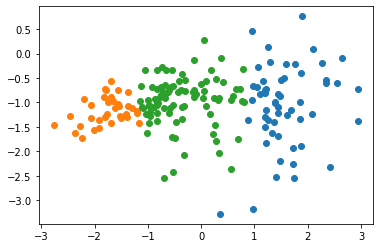

In [0]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = SpectralClustering(n_clusters=3)   # nclusters=3
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Gaussian Mixture Model

A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.

For more on the model, see:

    Mixture model, Wikipedia.

It is implemented via the GaussianMixture class and the main configuration to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

The complete example is listed below.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, we can see that the clusters were identified perfectly. This is not surprising given that the dataset was generated as a mixture of Gaussians.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, we can see that the clusters were identified perfectly. This is not surprising given that the dataset was generated as a mixture of Gaussians.

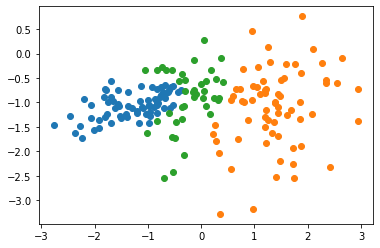

In [0]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=3)   # nclusters=3  (ncomponents?)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()



# Further Reading

This section provides more resources on the topic if you are looking to go deeper.
Papers

    Clustering by Passing Messages Between Data Points, 2007.
    BIRCH: An efficient data clustering method for large databases, 1996.
    A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise, 1996.
    Some methods for classification and analysis of multivariate observations, 1967.
    Web-Scale K-Means Clustering, 2010.
    Mean Shift: A robust approach toward feature space analysis, 2002.
    On Spectral Clustering: Analysis and an algorithm, 2002.

Books

    Data Mining: Practical Machine Learning Tools and Techniques, 2016.
    The Elements of Statistical Learning: Data Mining, Inference, and Prediction, 2016.
    Machine Learning: A Probabilistic Perspective, 2012.

APIs

    Clustering, scikit-learn API.
    sklearn.datasets.make_classification API.
    sklearn.cluster API.

Articles

    Cluster analysis, Wikipedia.
    Hierarchical clustering, Wikipedia.
    k-means clustering, Wikipedia.
    Mixture model, Wikipedia.

Summary

In this tutorial, you discovered how to fit and use top clustering algorithms in python.

Specifically, you learned:

    Clustering is an unsupervised problem of finding natural groups in the feature space of input data.
    There are many different clustering algorithms, and no single best method for all datasets.
    How to implement, fit, and use top clustering algorithms in Python with the scikit-learn machine learning library.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.